## This comparison is done with SNO Laserball


In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   


TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/greydisc_modeling/laserball_sno'

In [3]:
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')

In [4]:
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

TClass::TClass:0: RuntimeWarning: no dictionary for class RAT::DU::ShadowingCalculator is available


<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [5]:
data_dir = '/home/jp/projects/snoplus/data/oca'
file_list = os.listdir(data_dir)
print file_list

['sno_010622_p4.rch', 'sno_010623_p3.rch', 'sno_010625_p4.rch']


In [7]:
tfile = ROOT.TFile(os.path.join(data_dir, file_list[1]))

In [12]:
time = tfile.Get('fRchTime')

In [13]:
type(time)

__main__.TH2F

In [5]:
# Load the calibration data
data_dir = '/home/jp/projects/snoplus/data/oca'
file_list = os.listdir(data_dir)
print file_list
binc  = []
xaxis = []

for one_file in file_list:
    tfile = ROOT.TFile(os.path.join(data_dir, one_file))
    
    print 'File information'
    spos = np.array(tfile.Get('source_pos'))
    print 'Position: ', spos
    lamb = np.array(tfile.Get('lambda'))
    print 'Lambda ', lamb
    cast = np.array(tfile.Get('cast'))
    print 'Cast ', cast
    version = np.array(tfile.Get('version'))
    print 'Version ', version
    
    # Getting the info out of this one file
    caltime = tfile.Get('fRchTime')
    caltime_x = caltime.ProjectionX()
    rootaxis = caltime_x.GetXaxis()
    
    nbins = caltime_x.GetNbinsX()
    binc.append(np.zeros(nbins))
    xaxis.append(np.zeros(nbins+1))
    
    for ibin in range(nbins):
        binc[-1][ibin]  = caltime_x.GetBinContent(ibin)
        xaxis[-1][ibin] = rootaxis.GetBinLowEdge(ibin)
    xaxis[-1][nbins] = rootaxis.GetBinLowEdge(nbins)    

    
    


['sno_010622_p4.rch', 'sno_010623_p3.rch', 'sno_010625_p4.rch']
File information
Position:  [  0.13         0.86000001   0.14        99.70478058]
Lambda  [   4.  500.]
Cast  [  4.00000000e+00   4.00000000e+00   1.99999996e-02   8.50000024e-01
   6.65400009e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Version  [ 1.]
File information
Position:  [  0.23         0.81999999   0.15000001  99.73439026]
Lambda  [   4.  500.]
Cast  [  4.           4.           0.13         0.86000001  66.54000092   0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.        ]
Version  [ 1.]
File information
Position:  [  0.23         0.79000002   0.15000001  43.71563339]
Lambda  [   4.  500.]
Cast  [  4.           4.           0.23         0.79000002  66.55000305   0.           0.
   0.           0.           0.           0.     

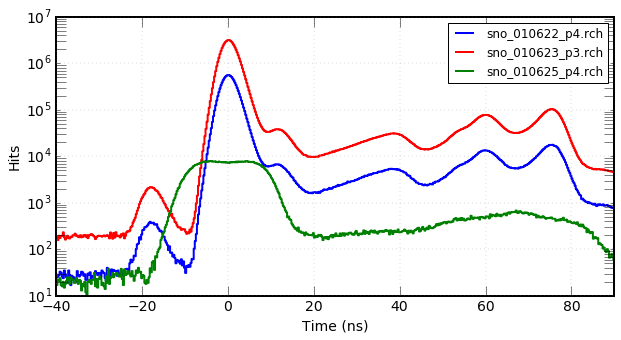

In [6]:
fig = plt.figure(figsize=(10,5))
jplot.unfilledBar(xaxis[0], binc[0], color = 'blue', label = file_list[0])
jplot.unfilledBar(xaxis[1], binc[1], color = 'red', label = file_list[1])
jplot.unfilledBar(xaxis[2], binc[2], color = 'green', label = file_list[2])

plt.yscale('log')
plt.xlim([-40, 90])
plt.ylim([10,1e7])
plt.ylabel('Hits')
plt.xlabel('Time (ns)')
plt.legend()

In [7]:
calx = xaxis[1]
caly = binc[1]

In [8]:
basedir = '/home/jp/projects/snoplus/rundir/greydisc_validation'
#/home/jp/projects/snoplus/rundir/meeting_summer16/response'
fname = 'laserball_oca_water.root'

In [9]:
sno = []
sno_hittimes = []
sno_petimes = []
snoqtot = []
snoqpmt = []
snoxpmt = []
snotr   = []
dirname = []

In [10]:
# Reading fcn
def readRatOutput(one_dirname):
    if one_dirname in dirname:
        print 'This directory is already inside', one_dirname
        return
    dirname.append(one_dirname)
    file_name = os.path.join(basedir, dirname[-1], fname)
    print file_name
    sno.append(lowlevel_stats.getMChits(file_name))
    sno_hittimes.append(lowlevel_stats.getHitTimes_MC(file_name))
    sno_petimes.append(lowlevel_stats.getPETimes_MC(file_name))
    snoqtot_aux, snoqpmt_aux, snoxpmt_aux, snotr_aux= lowlevel_stats.getPEcharge(file_name)
    snoqtot.append(snoqtot_aux)
    snoqpmt.append(snoqpmt_aux)
    snoxpmt.append(snoxpmt_aux)
    snotr.append(snotr_aux)

In [11]:
readRatOutput('laserball_sno_gdisc2')

/home/jp/projects/snoplus/rundir/greydisc_validation/laserball_sno_gdisc2/laserball_oca_water.root


In [12]:
readRatOutput('laserball_sno_3DPMT')

/home/jp/projects/snoplus/rundir/greydisc_validation/laserball_sno_3DPMT/laserball_oca_water.root


In [13]:
readRatOutput('laserball_sno_gdisc')

/home/jp/projects/snoplus/rundir/greydisc_validation/laserball_sno_gdisc/laserball_oca_water.root


In [14]:
readRatOutput('laserball_sno_gdisc2.1')

/home/jp/projects/snoplus/rundir/greydisc_validation/laserball_sno_gdisc2.1/laserball_oca_water.root


## Checking the NHits distribution

In [15]:
mycolors = ['b','r','g','m','c', 'y', '0.6']
def plotNhits(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(0, 100, 2)
    #xaxis = np.arange(0, 4000, 300)

    nbins = []
    myfig = plt.figure(figsize=(8,5))

    for i, one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        
        print 'SUM ', one_nhits.sum()
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        
        jplot.unfilledBar(xaxis, nbins[-1]*scale_factor[i], 
                              color = mycolors[i])
        jplot.errorMark(xaxis, nbins[-1]*scale_factor[i], 
                        error=np.sqrt(nbins[-1])*scale_factor[i], color=mycolors[i],
                       label =labels[i] + ' ' + \
                                                          '\nmean=' + "%.2f" % one_nhits.mean() +\
                                                          '\nstd=' + "%.2f" % one_nhits.std()) 
        print labels[i]
    

    
        
        
    plt.xlabel('Nhits (laserball @500nm)')
    plt.ylabel('Entries per event')
    
    #plt.ylim([0,])
    plt.legend(loc=0,ncol=1)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

In [16]:
dirname

['laserball_sno_gdisc2',
 'laserball_sno_3DPMT',
 'laserball_sno_gdisc',
 'laserball_sno_gdisc2.1']

SUM  52464
Mean  52.464
Std   7.01203993143
SNO 3DPMT
SUM  53484
Mean  53.484
Std   7.11025625417
SNO GDisc
SUM  52504
Mean  52.504
Std   7.05861062816
SNO GDisc2
SUM  63999
Mean  52.5875102712
Std   7.10832547141
SNO GDisc2.1


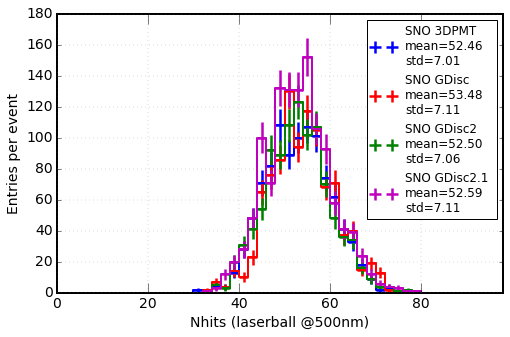

In [19]:
plotNhits([sno[1], sno[2], sno[0], sno[3]],
            [1., 1., 1., 1.], 
          ['SNO 3DPMT', 'SNO GDisc', 'SNO GDisc2', 'SNO GDisc2.1'], 
          'SNO_laserball_nhit')

## Checking the hit times distribution

In [24]:
mycolors = ['b','r','g','m','c', 'y', '0.6']

# Calibration scaling in number of photons
ti, tf = -5, 90
cal_range = [np.where(calx>ti)[0][0],np.where(calx>tf)[0][0]]
#print mc_range, cal_range
calwidth= calx[1]-calx[0]
calsum = caly[cal_range[0]:cal_range[1]].sum()*calwidth
print calsum

def plotTOA(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(-200, 500, 1)#20, 4000)
    nbins = []
    for i,one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        
    # Find the peak and place it at t=0
    xaxis = xaxis - xaxis[nbins[0].argmax()]
    mc_range  = [np.where(xaxis>ti)[0][0],np.where(xaxis>tf)[0][0]]
    mcwidth = xaxis[1]-xaxis[0]

    
        
    myfig = plt.figure(figsize=(15,9))
    for i, one_n in enumerate(nbins):
        mcintegral = np.sum(one_n[mc_range[0]:mc_range[1]])*mcwidth
        factor = calsum/mcintegral

        print 'MCintegral', mcintegral
        print 'Factor', factor
        jplot.unfilledBar(xaxis, factor*one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        #jplot.errorMark(xaxis, factor*one_n*scale_factor[i], 
        #                error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

    
    
    
    #factor = nbins[0].sum()*mcwidth/caly.sum()/calwidth
    #print factor
    jplot.unfilledBar(calx, caly, color='k', label='Calibration')
    
    
    plt.xlabel('Hit time (ns, laserball @500nm)')
    plt.ylabel('Hits (rescaled to preserve integral)')        
    plt.xlim([-50, 90])
    plt.ylim([500, factor*nbins[0].max()*2])
    
    plt.yscale('log')
    #plt.ylim([0,])

    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

17001090.0


Mean  150.552632032
Std   38.3627646787
Mean  152.714022483
Std   40.7808007997
Mean  151.286506044
Std   38.4634824401
Mean  151.058976906
Std   39.0246844825
MCintegral 49194
Factor 345.592755214
SNO 3DPMT
MCintegral 50012
Factor 339.940214349
SNO GDisc
MCintegral 49207
Factor 345.501453045
SNO GDisc2
MCintegral 59833
Factor 284.14236291
SNO GDisc2.1


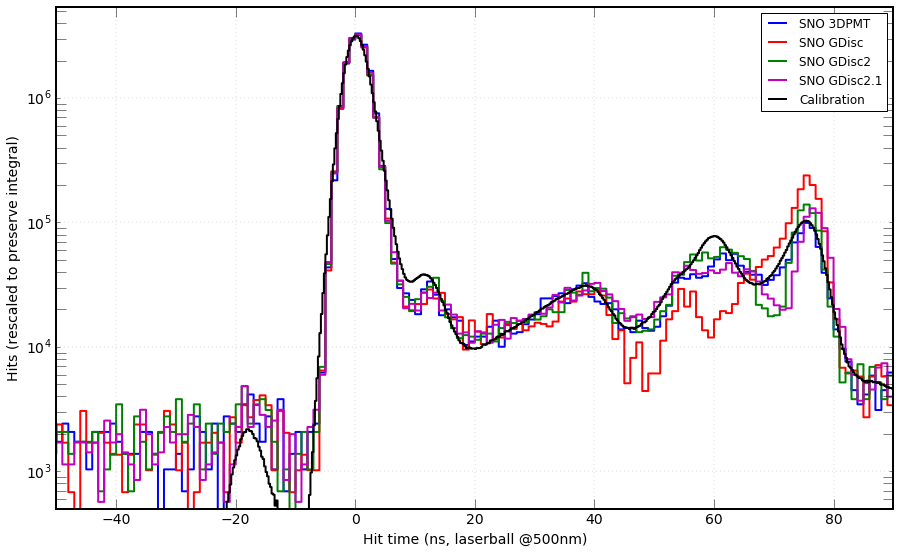

In [25]:
plotTOA([sno_hittimes[1], sno_hittimes[2], sno_hittimes[0], sno_hittimes[3]],
            [1., 1., 1., 1.], 
          ['SNO 3DPMT', 'SNO GDisc', 'SNO GDisc2', 'SNO GDisc2.1'], 
          'SNO_laserball_TOA')